In [1]:
import pandas as pd

In [2]:
#Load the data

temp_data=pd.read_csv('temperature.csv')
co2_data=pd.read_csv("carbon_emmission.csv")

In [3]:
temp_data.head()

ObjectId                       Country ISO2 ISO3  F1961  F1962  F1963  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG -0.113 -0.164  0.847   
1         2                       Albania   AL  ALB  0.627  0.326  0.075   
2         3                       Algeria   DZ  DZA  0.164  0.114  0.077   
3         4                American Samoa   AS  ASM  0.079 -0.042  0.169   
4         5      Andorra, Principality of   AD  AND  0.736  0.112 -0.752   

   F1964  F1965  F1966  ...  F2013  F2014  F2015  F2016  F2017  F2018  F2019  \
0 -0.764 -0.244  0.226  ...  1.281  0.456  1.093  1.555  1.540  1.544  0.910   
1 -0.166 -0.388  0.559  ...  1.333  1.198  1.569  1.464  1.121  2.028  1.675   
2  0.250 -0.100  0.433  ...  1.192  1.690  1.121  1.757  1.512  1.210  1.115   
3 -0.140 -0.562  0.181  ...  1.257  1.170  1.009  1.539  1.435  1.189  1.539   
4  0.308 -0.490  0.415  ...  0.831  1.946  1.690  1.990  1.925  1.919  1.964   

   F2020  F2021  F2022  
0  0.498  1.327  2.012  
1  1.498  1.536  1.518  
2  1.926  2.330  1.688  
3  1.430  1.268  1.256  
4  2.562  1.533  3.243  

[5 rows x 66 columns]

In [6]:
co2_data.head()

ObjectId Country     Date   Value
0         1   World  1958M03  315.70
1         2   World  1958M04  317.45
2         3   World  1958M05  317.51
3         4   World  1958M06  317.24
4         5   World  1958M07  315.86

In [453]:
#Selecting and computing statistics for temp. changes
temp_values=temp_data.filter(regex='^F').stack()
temp_stats={
    "Mean":temp_values.mean(),
    "Median":temp_values.median(),
    "Variance":temp_values.var()
}

In [454]:
temp_stats

{'Mean': 0.5377713483146068, 'Median': 0.47, 'Variance': 0.4294524831504378}

In [455]:
#Computing statistics for co2 concentration
co2_values=co2_data['Value']
co2_states={
    "Mean":co2_values.mean(),
    "Median":co2_values.median(),
    "Variance":co2_values.var()
}

In [456]:
co2_states

{'Mean': 180.71615286624203, 'Median': 313.835, 'Variance': 32600.00200469294}

In [457]:
import plotly.graph_objects as go
import plotly.express as px

In [458]:
#extracting time series data for plotting
#temperature: averaging across countries for each year
temp_years=temp_data.filter(regex='^F').mean(axis=0)
temp_years.index=temp_years.index.str.replace('F','').astype('int')

#co2: parsing year and averaging monthly data
co2_data['Year']=co2_data['Date'].str[:4].astype('int')
co2_yearly=co2_data.groupby('Year')['Value'].mean()

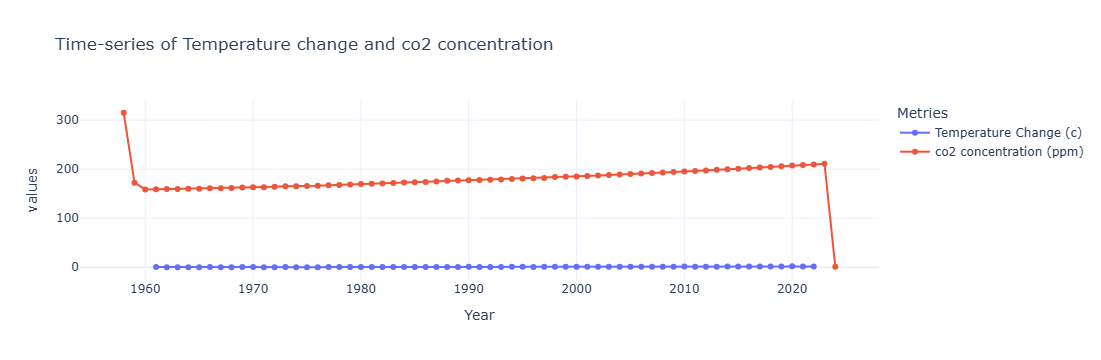

In [459]:
#time-series plot for temperature and co2 levels
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=temp_years.index,
    y=temp_years.values,
    mode='lines+markers',
    name='Temperature Change (c)'
))

fig.add_trace(go.Scatter(
    x=co2_yearly.index,
    y=co2_yearly.values,
    mode='lines+markers',
    name='co2 concentration (ppm)'
))

fig.update_layout(
    title='Time-series of Temperature change and co2 concentration',
    xaxis_title='Year',
    yaxis_title='values',
    template='plotly_white',
    legend_title='Metries'
)
fig.show()

In [460]:
#Correlation Heatmap
merged_data=pd.DataFrame({
    'Temperature Change':temp_years,
    'co2 Concerntration':co2_yearly
}).dropna()

In [461]:
heatmap_fig=px.imshow(
    merged_data.corr(),
    text_auto='.2f',
    color_continuous_scale='RdBu',
    title='Correlation Heatmap'
)

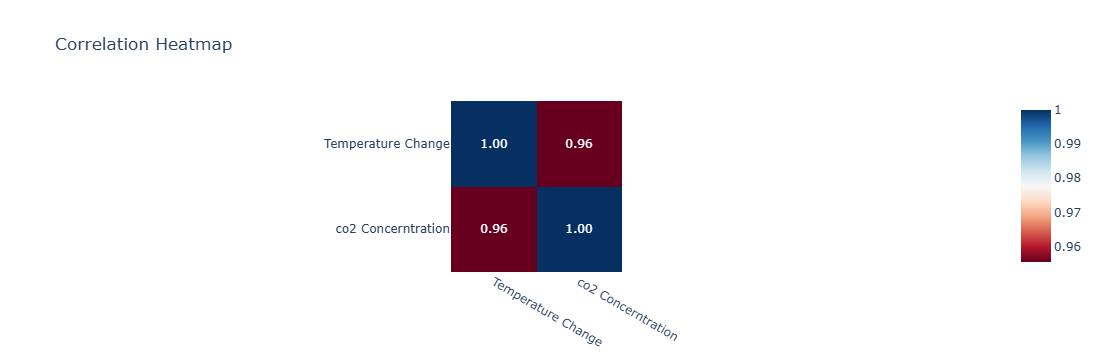

In [462]:
heatmap_fig.update_layout(template='plotly_white')
heatmap_fig.show()

In [463]:
#Scatter plot: temperature vs co2 concentration
scatter_fig=px.scatter(
    merged_data,
    x='co2 Concerntration',
    y='Temperature Change',
    labels={'co2 Concerntration':'co2 Concerntration','Temperature Change':'Temperature Change'},
    title='Temperature change vs co2 concentration',
    template='plotly_white'
)

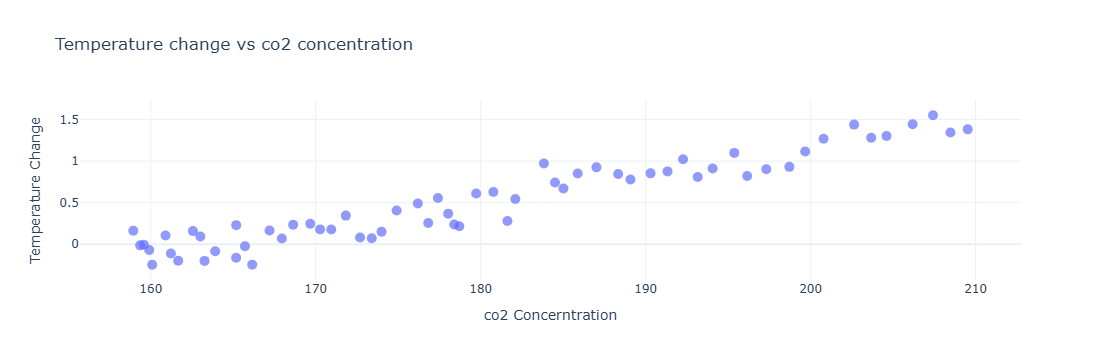

In [464]:
scatter_fig.update_traces(marker=dict(size=10,opacity=0.7))
scatter_fig.show()

In [465]:
from scipy.stats import linregress

In [466]:
#Temperature Trend
temp_trend=linregress(temp_years.index,temp_years.values)
temp_trend_line=temp_trend.slope*temp_years.index+temp_trend.intercept

In [467]:
#Co2 Trend
co2_trend=linregress(co2_yearly.index,co2_yearly.values)
co2_trend_line=co2_trend.slope*co2_yearly.index+co2_trend.intercept

In [468]:
fig_trends=go.Figure()

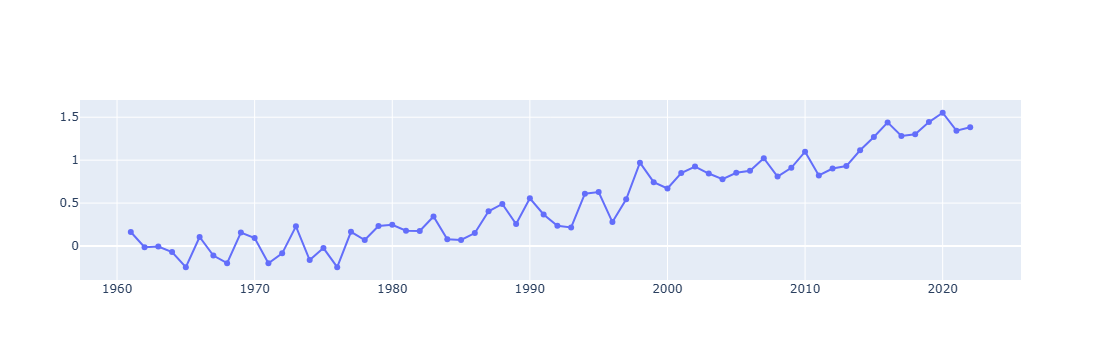

In [469]:
fig_trends.add_trace(go.Scatter(
    x=temp_years.index,
    y=temp_years.values,
    mode='lines+markers',
    name='Temperature Change(C)'
))

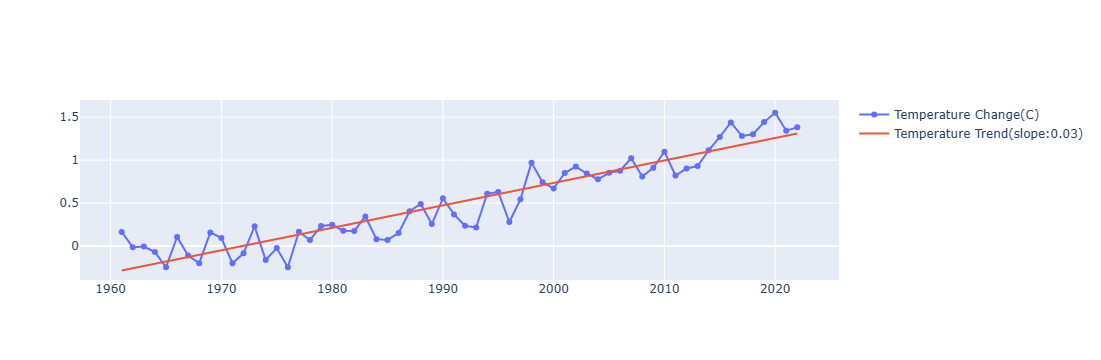

In [470]:
fig_trends.add_trace(go.Scatter(
    x=temp_years.index,
    y=temp_trend_line,
    mode='lines',
    name=f'Temperature Trend(slope:{temp_trend.slope:.2f})'
))

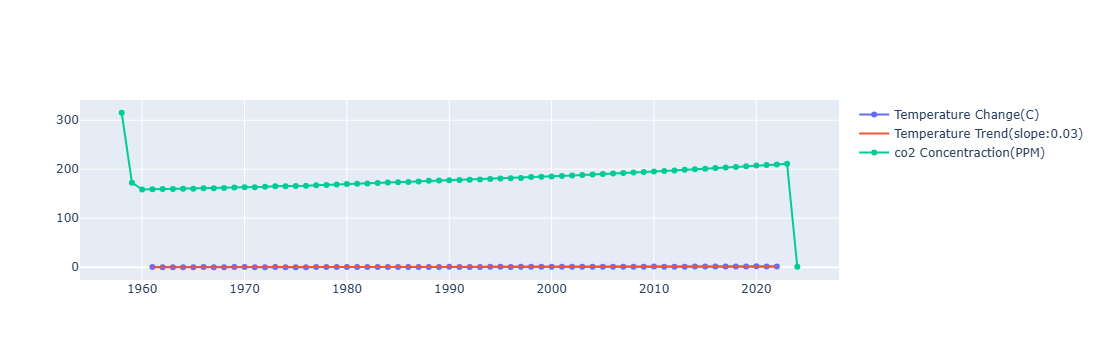

In [471]:
fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index,
    y=co2_yearly.values,
    mode='lines+markers',
    name='co2 Concentraction(PPM)'
))

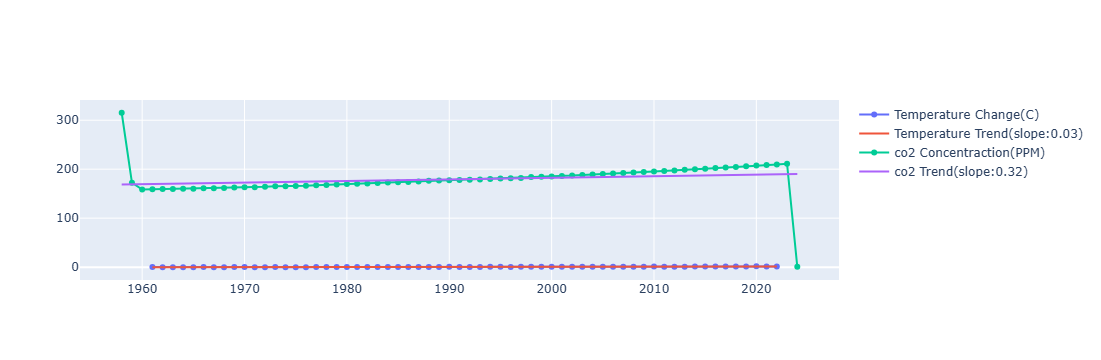

In [472]:
fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index,
    y=co2_trend_line,
    mode='lines',
    name=f'co2 Trend(slope:{co2_trend.slope:.2f})'
))

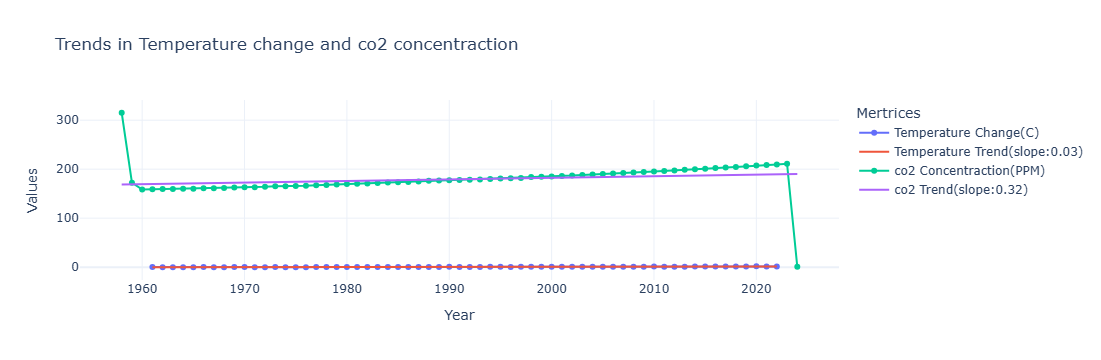

In [473]:
fig_trends.update_layout(
    title='Trends in Temperature change and co2 concentraction',
    xaxis_title='Year',
    yaxis_title='Values',
    template='plotly_white',
    legend_title='Mertrices'
)
fig_trends.show()

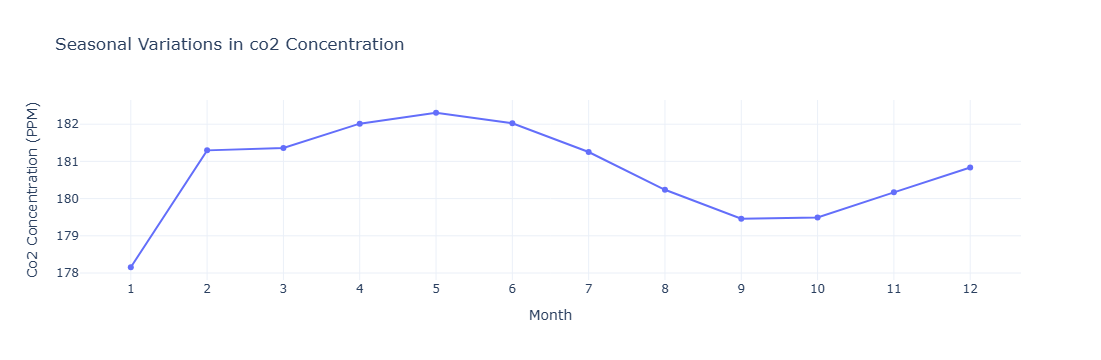

In [474]:
#Seasonal variations in co2 concentration
co2_data['Month']=co2_data['Date'].str[-2:].astype(int)
co2_monthly=co2_data.groupby('Month')['Value'].mean()

fig_seasonal=px.line(
    co2_monthly,
    x=co2_monthly.index,
    y=co2_monthly.values,
    labels={'x':'Month','y':'Co2 Concentration (PPM)'},
    title='Seasonal Variations in co2 Concentration',
    markers=True
)

fig_seasonal.update_layout(
    xaxis=dict(tickmode='array',tickvals=list(range(1,13))),
    template='plotly_white'
)
fig_seasonal.show()

In [475]:
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import grangercausalitytests

In [476]:
# pearson and spearman correlation coefficients
pearson_corr, _ = pearsonr(merged_data["co2 Concerntration"], merged_data["Temperature Change"])
spearman_corr, _ = spearmanr(merged_data["co2 Concerntration"], merged_data["Temperature Change"])
# granger causality test
granger_data = merged_data.diff().dropna()  # first differencing to make data stationary
granger_results = grangercausalitytests(granger_data, maxlag=3)

# extracting p-values for causality
granger_p_values = {f"Lag {lag}": round(results[0]['ssr_chi2test'][1], 4)
                    for lag, results in granger_results.items()}

pearson_corr, spearman_corr, granger_p_values


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3160  , p=0.0739  , df_denom=57, df_num=1
ssr based chi2 test:   chi2=3.4906  , p=0.0617  , df=1
likelihood ratio test: chi2=3.3928  , p=0.0655  , df=1
parameter F test:         F=3.3160  , p=0.0739  , df_denom=57, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3592  , p=0.6999  , df_denom=54, df_num=2
ssr based chi2 test:   chi2=0.7848  , p=0.6754  , df=2
likelihood ratio test: chi2=0.7796  , p=0.6772  , df=2
parameter F test:         F=0.3592  , p=0.6999  , df_denom=54, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0755  , p=0.3678  , df_denom=51, df_num=3
ssr based chi2 test:   chi2=3.6695  , p=0.2994  , df=3
likelihood ratio test: chi2=3.5581  , p=0.3133  , df=3
parameter F test:         F=1.0755  , p=0.3678  , df_denom=51, df_num=3


(0.9554282559257312,
 0.9379013371609882,
 {'Lag 1': 0.0617, 'Lag 2': 0.6754, 'Lag 3': 0.2994})

In [477]:
import statsmodels.api as sm

In [478]:
#Creating lagged co2 data to investigate lagged effects
merged_data['co2 Lag1']=merged_data['co2 Concerntration'].shift(1)
merged_data['co2 Lag2']=merged_data['co2 Concerntration'].shift(2)
merged_data['co2 Lag3']=merged_data['co2 Concerntration'].shift(3)

In [479]:
#Droping rows with NaN due to lags
lagged_data=merged_data.dropna()

In [480]:
x=lagged_data[['co2 Concerntration','co2 Lag1','co2 Lag2','co2 Lag3']]
y=lagged_data['Temperature Change']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model_summary=model.summary()

In [481]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Temperature Change   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     252.5
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           2.97e-34
Time:                        14:38:13   Log-Likelihood:                 45.098
No. Observations:                  59   AIC:                            -80.20
Df Residuals:                      54   BIC:                            -69.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.7980      0.317    -15.137      0.000      -5.434      -4.163
co2 Concerntration     0.3245      0.055      5.942      0.000       0.215       0.434
co2 Lag1              -0.2962      0.068     -4.361      0.000      -0.432      -0.160
co2 Lag2               0.0104      0.068      0.153      0.879      -0.126       0.146
co2 Lag3              -0.0107      0.056     -0.191      0.849      -0.123       0.101
==============================================================================
Omnibus:                        2.369   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                2.077
Skew:                          -0.457   Prob(JB):                        0.354
Kurtosis:                       2.902   Cond. No.                     7.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [482]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [483]:
#preparing the data for clustering
clustering_data=merged_data[['Temperature Change','co2 Concerntration']].dropna()
scaler=StandardScaler()
scaled_data=scaler.fit_transform(clustering_data)

In [484]:
#Applying k-means clustering
kmeans=KMeans(n_clusters=3,random_state=42)
clustering_data['cluster']=kmeans.fit_predict(scaled_data)

#adding labels for period with similar climate pattern
clustering_data['Label']=clustering_data['cluster'].map({
    0:'Moderatew Temp. & CO2',
    1:'High Temp. & CO2',
    2:'Low Temp & CO2'
})

In [485]:
import plotly.express as px

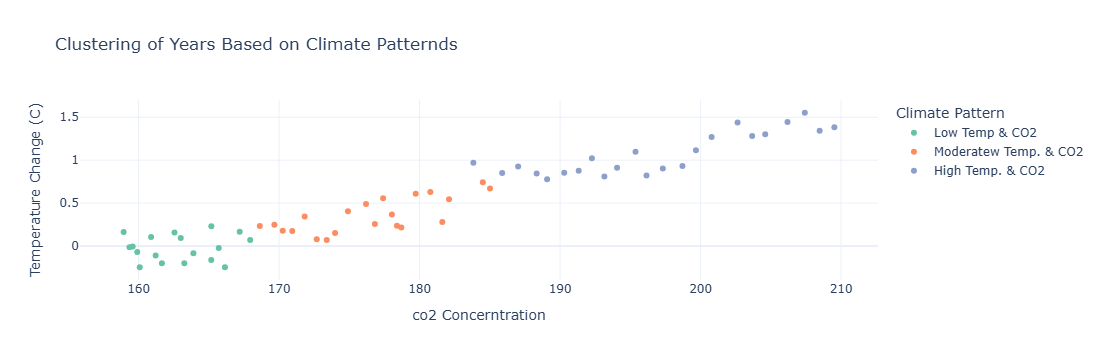

In [486]:
fig_clusters=px.scatter(
    clustering_data,
    x='co2 Concerntration',
    y='Temperature Change',
    color='Label',
    color_discrete_sequence=px.colors.qualitative.Set2,
    labels={
        'Co2 Concerntration':'Co2 Concerntration (PPM)',
        'Temperature Change':'Temperature Change (C)',
        'Label':'Climate Pattern'
        
    },
    title='Clustering of Years Based on Climate Patternds'
)

fig_clusters.update_layout(
    template='plotly_white',
    legend_title='Climate Pattern'
)

fig_clusters.show()

In [487]:
#Setting up a simple predictive model using linear regression
from sklearn.linear_model import LinearRegression

In [488]:
#Preparing data
x=merged_data[['co2 Concerntration']].values
y=merged_data['Temperature Change'].values

model=LinearRegression()
model.fit(x,y)

#function to simulate wht-if scenarios
def simulate_temp_change(co2_percent_change):
    current_mean_co2=merged_data['co2 Concerntration'].mean()
    new_co2=current_mean_co2*(1+co2_percent_change/100)
    predict_temp=model.predict([[new_co2]])
    return predict_temp[0]

In [489]:
# simulating scenarios
scenarios = {
    "Increase CO₂ by 10%": simulate_temp_change(10),
    "Decrease CO₂ by 10%": simulate_temp_change(-10),
    "Increase CO₂ by 20%": simulate_temp_change(20),
    "Decrease CO₂ by 20%": simulate_temp_change(-20),
    
}

scenarios

{'Increase CO₂ by 10%': 1.0866445037958155,
 'Decrease CO₂ by 10%': -0.059993041237237144,
 'Increase CO₂ by 20%': 1.6599632763123413,
 'Decrease CO₂ by 20%': -0.633311813753763}